In [ ]:
!pip install pykalman
!pip install pycaret
!pip install yfinance
!pip install ta
!pip install mxnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48443 sha256=3a4c563f5d24ef0aa2be70aadd6f72840759aec0d9d3527a849305e533bc3958
  Stored in directory: /root/.cache/pip/wheels/76/33/ef/5f332226e13a5089c6dd4b01cc2bcb59491d18f955fa2d3807
Successfully built pykalman
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.6 

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from ta import add_all_ta_features

In [ ]:
listSymbols = ['^VIX', 'ES=F', 'YM=F', 'NQ=F', 'ZB=F', 'ZN=F', 'ZT=F', 'GC=F', 'SI=F', 'HG=F', 'CL=F', 'HO=F', 'NG=F', 'BZ=F', '^GSPC', '^DJI', '^NYA', '^XAX',
              '^RUT', '^VIX', '^FTSE', '^GDAXI', '^FCHI', '^STOXX50E', '^N100', '^BFX', '^N225', '399001.SZ', '^STI', '^AXJO', '^AORD', '^BSESN', '^JKSE', '^KLSE',
              '^NZ50', '^KS11', '^TWII', '^GSPTSE', '^BVSP', '^MXX', '^IPSA', '^MERV', '^CASE30', '^JN0U.JO', 'EURUSD=X', 'JPY=X', 'GBPUSD=X', 'AUDUSD=X', 'NZDUSD=X', 'EURJPY=X',
              'GBPJPY=X', 'EURGBP=X', 'EURCAD=X', 'EURSEK=X', 'EURCHF=X', 'EURHUF=X', 'EURJPY=X', 'CNY=X', 'HKD=X', 'SGD=X', 'INR=X', 'MXN=X', 'PHP=X', 'IDR=X', 'THB=X', 'MYR=X',
              'ZAR=X', 'RUB=X', 'BTC-USD', 'ETH-USD', '^IRX', '^FVX', '^TNX', '^TYX', 'AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'JPM', 'TSM', 'JNJ', 'XOM',
              'WMT', 'PG', 'ORCL', 'CVX', 'BAC', 'MRK', 'KO', 'PEP', 'BABA', 'CSCO', 'AZN', 'PFE', 'CMCSA', 'CVX', 'AMD', 'NEE', 'MDT', 'SCHW', 'NKE', 'DIS', 'WFC', 'MS', 'VZ',
              'VALE3.SA', 'PETR4.SA', 'ITUB4.SA', 'BBAS3.SA', 'PRIO3.SA', 'B3SA3.SA', 'LREN3.SA', 'GOLL4.SA', 'MGLU3.SA', 'RADL3.SA', 'WEGE3.SA', 'BBDC4.SA', 'USIM5.SA', 'BPAC11.SA',
              'COGN3.SA', 'AZUL4.SA']

target_date = '2023-08-11'

df2 = yf.download('^BVSP', start='2001-01-01', end='2024-01-01').reset_index()
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d')
df2 = df2[['Date', 'Adj Close']]

for i in listSymbols:
  try:
      df2_aux = yf.download(i, start='2001-01-01', end='2024-01-01').reset_index()
      df2_aux['Date'] = df2_aux['Date'].dt.strftime('%Y-%m-%d')

      df2_zero = pd.DataFrame()
      df2_zero['Date'] = df2_aux['Date'].copy()

      conditional = target_date in df2_aux['Date'].values

      if conditional:

        df2_aux = add_all_ta_features(df2_aux, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

        df2_aux = df2_aux.drop(['Date', 'others_dr', 'others_dlr', 'others_cr'], axis=1)

        for column in list(df2_aux.columns):
          df2_zero[f'{i}_{column}'] = df2_aux[column]

        for j in range(2, 20):
          df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)


        close_fft = np.fft.fft(np.asarray(df2_zero[f'{i}_Close'].tolist()))
        fft_df = pd.DataFrame({'fft':close_fft})
        fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
        fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

        fft_list = np.asarray(fft_df['fft'].tolist())
        for num_ in [3, 5, 10, 15, 22]:
            fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
            df_testando = pd.DataFrame(np.fft.ifft(fft_list_m10))
            df_testando[f'fourier_real_{num_}_{i}'] = df_testando[0].apply(lambda x: x.real)
            df_testando[f'fourier_im_{num_}_{i}'] = df_testando[0].apply(lambda x: x.imag)
            df_testando[f'fourier_{num_}_{i}'] = df_testando[f'fourier_real_{num_}_{i}'] + df_testando[f'fourier_im_{num_}_{i}']

            df2_zero[f'fourier_real_{num_}_{i}'] = df_testando[f'fourier_real_{num_}_{i}']
            df2_zero[f'fourier_im_{num_}_{i}'] = df_testando[f'fourier_im_{num_}_{i}']
            df2_zero[f'fourier_{num_}_{i}'] = df_testando[f'fourier_{num_}_{i}']

        df2 = df2_zero.merge(df2, on='Date', how='left')
  except:
    pass

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_zero[f'{i}_lag{j}'] = df2_zero[f'{i}_Close'].shift(j)
<ipython-input-3-736291b43ae0>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

[*********************100%%**********************]  1 of 1 completed

In [ ]:
df_checkpoint1 = df2.copy()

In [ ]:
df = yf.download('ABEV3.SA', start='2001-01-01', end='2024-01-01').reset_index()
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

df2_copia = df2.copy()

df = df.merge(df2_copia, on='Date', how='left')

for i in range(2, 22):
  df[f'Close{i}'] = df['Close'].shift(i)

df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

df = df.drop(['Date', 'others_dr', 'others_dlr', 'others_cr'], axis=1)

df3 = df.copy()

cols_with_inf = df3.columns[df3.isin([np.inf, -np.inf]).any()]

for col in cols_with_inf:
    for idx, value in df3[df3[col].isin([np.inf, -np.inf])][col].iteritems():
        if idx > 0:
            df3.at[idx, col] = df3.at[idx - 1, col]

cols_with_inf = df3.columns[df3.isin([np.inf, -np.inf]).any()]

for col in cols_with_inf:
    for idx, value in df3[df3[col].isin([np.inf, -np.inf])][col].iteritems():
        if idx > 0:
            df3.at[idx, col] = 0

close_fft = np.fft.fft(np.asarray(df3['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 5, 10, 15, 22]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    df_testando = pd.DataFrame(np.fft.ifft(fft_list_m10))

    df_testando[f'fourier_real_{num_}_Close'] = df_testando[0].apply(lambda x: x.real)
    df_testando[f'fourier_im_{num_}_Close'] = df_testando[0].apply(lambda x: x.imag)
    df_testando[f'fourier_{num_}_Close'] = df_testando[f'fourier_real_{num_}_Close'] + df_testando[f'fourier_im_{num_}_Close']

    df3[f'fourier_real_{num_}_Close'] = df_testando[f'fourier_real_{num_}_Close']
    df3[f'fourier_im_{num_}_Close'] = df_testando[f'fourier_im_{num_}_Close']
    df3[f'fourier_{num_}_Close'] = df_testando[f'fourier_{num_}_Close']

In [ ]:
df4 = df3.copy()

In [ ]:
df4

In [ ]:
df_process = df4.copy()[-1000:]

num_nan = df_process.isnull().sum()
colunas_filtradas = num_nan[num_nan < 50].index
df_filtrado = df4[colunas_filtradas]

In [ ]:
df_regression = df_filtrado.copy().dropna()

In [ ]:
df_regression['predictTarget'] = df_regression['Close'].shift(-1)

In [ ]:
df_regression

In [ ]:
import mxnet as mx

df5 = df_regression.copy().dropna()

batch_size = 128
n_batches = df5.shape[0]/batch_size
VAE_data = df5.values

num_training_days = int(len(df5)) - 252

train_iter = mx.io.NDArrayIter(data={'data': VAE_data[:num_training_days,:-1]}, \
                               label={'label': VAE_data[:num_training_days, -1]}, batch_size = batch_size)
test_iter = mx.io.NDArrayIter(data={'data': VAE_data[num_training_days:,:-1]}, \
                              label={'label': VAE_data[num_training_days:,-1]}, batch_size = batch_size)

In [ ]:
from mxnet import gluon

model_ctx =  mx.cpu()
class VAE(gluon.HybridBlock):
    def __init__(self, n_hidden=400, n_latent=2, n_layers=1, n_output=784, \
                 batch_size=100, act_type='relu', **kwargs):
        self.soft_zero = 1e-10
        self.n_latent = n_latent
        self.batch_size = batch_size
        self.output = None
        self.mu = None
        super(VAE, self).__init__(**kwargs)

        with self.name_scope():
            self.encoder = nn.HybridSequential(prefix='encoder')

            for i in range(n_layers):
                self.encoder.add(nn.Dense(n_hidden, activation=act_type))
            self.encoder.add(nn.Dense(n_latent*2, activation=None))

            self.decoder = nn.HybridSequential(prefix='decoder')
            for i in range(n_layers):
                self.decoder.add(nn.Dense(n_hidden, activation=act_type))
            self.decoder.add(nn.Dense(n_output, activation='sigmoid'))

    def hybrid_forward(self, F, x):
        h = self.encoder(x)
        #print(h)
        mu_lv = F.split(h, axis=1, num_outputs=2)
        mu = mu_lv[0]
        lv = mu_lv[1]
        self.mu = mu

        eps = F.random_normal(loc=0, scale=1, shape=(self.batch_size, self.n_latent), ctx=model_ctx)
        z = mu + F.exp(0.5*lv)*eps
        y = self.decoder(z)
        self.output = y

        KL = 0.5*F.sum(1+lv-mu*mu-F.exp(lv),axis=1)
        logloss = F.sum(x*F.log(y+self.soft_zero)+ (1-x)*F.log(1-y+self.soft_zero), axis=1)
        loss = -logloss-KL

        return loss

In [ ]:
from mxnet.gluon import nn

n_hidden=400
n_latent=5
n_layers=4
n_output=VAE_data.shape[1]-1

net = VAE(n_hidden=n_hidden, n_latent=n_latent, n_layers=n_layers, n_output=n_output, batch_size=batch_size, act_type='relu')

In [ ]:
net.collect_params().initialize(mx.init.Xavier(), ctx=mx.cpu())
net.hybridize()
trainer = gluon.Trainer(net.collect_params(), 'adam', {'learning_rate': .002})

In [ ]:
print(net)

In [ ]:
from mxnet import autograd
from mxnet import nd
import time

n_epoch = 400
print_period = n_epoch // 10
start = time.time()

training_loss = []
validation_loss = []
for epoch in range(n_epoch):
    epoch_loss = 0
    epoch_val_loss = 0

    train_iter.reset()
    test_iter.reset()

    n_batch_train = 0
    for batch in train_iter:
        n_batch_train +=1
        data = batch.data[0].as_in_context(mx.cpu())

        with autograd.record():
            loss = net(data)
        loss.backward()
        trainer.step(data.shape[0])
        epoch_loss += nd.mean(loss).asscalar()

    n_batch_val = 0
    for batch in test_iter:
        n_batch_val +=1
        data = batch.data[0].as_in_context(mx.cpu())
        loss = net(data)
        epoch_val_loss += nd.mean(loss).asscalar()

    epoch_loss /= n_batch_train
    epoch_val_loss /= n_batch_val

    training_loss.append(epoch_loss)
    validation_loss.append(epoch_val_loss)

    if epoch % max(print_period, 1) == 0:
        print('Epoch {}, Training loss {:.2f}, Validation loss {:.2f}'.\
              format(epoch, epoch_loss, epoch_val_loss))

end = time.time()
print('Training completed in {} seconds.'.format(int(end-start)))

In [ ]:
vae_added_df = mx.nd.array(df_regression.iloc[:, :-1].values)
pd.DataFrame(vae_added_df.asnumpy())

In [ ]:
df_pronto = pd.concat([df_regression.reset_index(), pd.DataFrame(vae_added_df.asnumpy())], axis=1)

In [ ]:
import numpy as np

cols_with_inf = df_pronto.columns[df_pronto.isin([np.inf, -np.inf]).any()]

for col in cols_with_inf:
    for idx, value in df_pronto[df_pronto[col].isin([np.inf, -np.inf])][col].iteritems():
        if idx > 0:
            df_pronto.at[idx, col] = 0

df_pronto = df_pronto.fillna(0)

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pronto.drop(['Close'], axis=1).dropna().values)

n_components = 1000
pca = PCA(n_components=n_components)

principal_components = pca.fit_transform(scaled_data)

principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

In [ ]:
df_pronto2 = pd.concat([principal_df, df_pronto], axis=1)

In [ ]:
df_pronto2

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_normalizado = scaler.fit_transform(df_pronto2.values)

df_normalizado = pd.DataFrame(X_normalizado, columns=df_pronto2.columns)

In [ ]:
df20_correlation = df_normalizado[:len(df_normalizado)-252].copy()

correlation_results = df20_correlation.corrwith(df20_correlation['predictTarget'])
correlation_results = correlation_results.abs().sort_values(ascending=False)
df_correlations = pd.DataFrame(correlation_results).reset_index()
df_correlations['columns'] = df_correlations[0]
df_correlations

In [ ]:
df_pronto2_aux = df_pronto2.copy()
df_pronto2 = df_pronto2.copy()[list(df_correlations.query('columns > 0.9 and columns < 0.99')['index'])]
df_pronto2['predictTarget'] = df_pronto['predictTarget']

In [ ]:
df_pronto2

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data_set = df_pronto2.drop(['predictTarget'], axis=1).loc[:, :].values
data_set_target = df_pronto2['predictTarget'].values

train_size = len(data_set) - 252

scaler = MinMaxScaler(feature_range=(0, 1))
data_set_scaled = scaler.fit_transform(data_set)

scaler = MinMaxScaler(feature_range=(0, 1))
data_set_target = scaler.fit_transform(data_set_target.reshape(-1, 1))

timesteps = 5

X_train = []
Y_train = []

for i in range(timesteps, train_size):
    X_train.append(data_set_scaled[i - timesteps:i, :])
    Y_train.append(data_set_target[i - 1])

X_train, Y_train = np.array(X_train), np.array(Y_train)

X_test = []
Y_test = []

for i in range(train_size, len(data_set_scaled)):
    X_test.append(data_set_scaled[i - timesteps:i, :])
    Y_test.append(data_set_target[i - 1])

X_test, Y_test = np.array(X_test), np.array(Y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, LSTM
import tensorflow as tf

regressor = Sequential()

regressor.add(LSTM(units=256, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

regressor.add(LSTM(units = 256))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1, activation="linear"))

regressor.compile(optimizer = "Nadam", loss = "mean_squared_error")

regressor.fit(X_train, Y_train, epochs = 100, batch_size = 4)

In [ ]:
predicted_stock_price = regressor.predict(X_test)

In [ ]:
df_testando = pd.DataFrame()
df_testando['real'] = pd.DataFrame(scaler.inverse_transform(Y_test))
df_testando['predicted'] = pd.DataFrame(scaler.inverse_transform(predicted_stock_price.reshape(-1, 1)))
df_testando

In [ ]:
df_testando.to_csv('RESULTADOS_ITUB4_V2.csv')

In [43]:
valor = 100
valores = []

for i in range(1, len(df_testando)-1):
  if (df_testando['predicted'].iloc[i] > df_testando['predicted'].iloc[i-1]):
    valor = valor*(1 + (df_testando['real'].iloc[i]- df_testando['real'].iloc[i-1])/df_testando['real'].iloc[i-1])
  else:
    valor = valor*(1 - (df_testando['real'].iloc[i]- df_testando['real'].iloc[i-1])/df_testando['real'].iloc[i-1])

  valores.append(valor)

valor

122.92208567358325

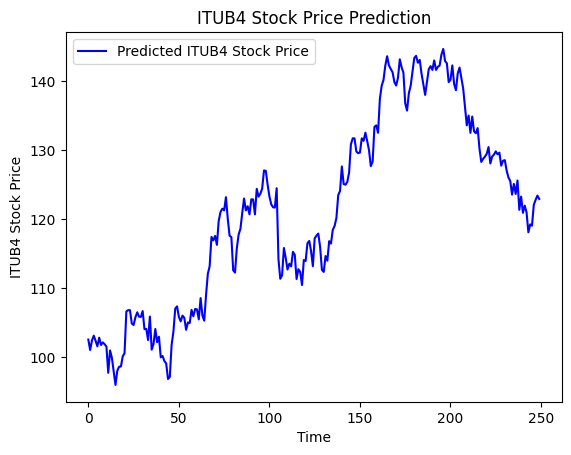

In [46]:
import matplotlib.pyplot as plt

plt.plot(valores, color = "blue", label = "Predicted ITUB4 Stock Price")
plt.title("ITUB4 Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("ITUB4 Stock Price")
plt.legend()
plt.show()

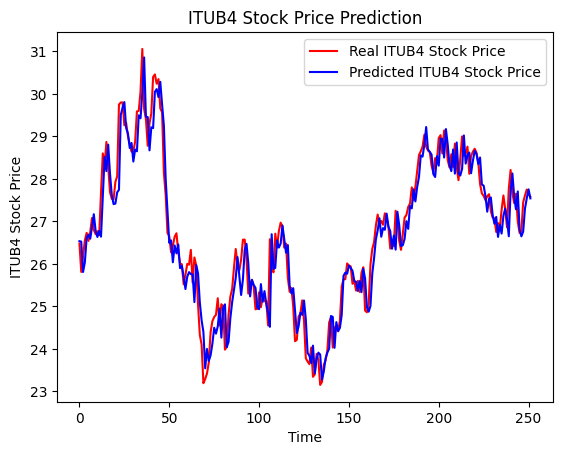

In [47]:
import matplotlib.pyplot as plt

plt.plot(df_testando['real'], color = "red", label = "Real ITUB4 Stock Price")
plt.plot(df_testando['predicted'], color = "blue", label = "Predicted ITUB4 Stock Price")
plt.title("ITUB4 Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("ITUB4 Stock Price")
plt.legend()
plt.show()